# Gaurav Singh Chandrabhan

## GRIP Task-2: Color Identification in Images

### Import required Libraries

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### Reading an Image

In [17]:
def get_img(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

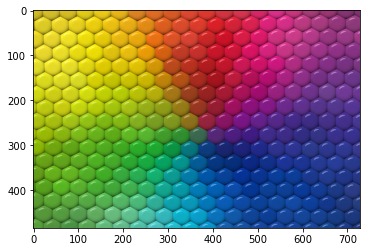

In [3]:
image = get_img("colorful.jpg")
plt.imshow(image)

### RGB to Hex Conversion

In [11]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Function for getting colors and creating a Pie Chart

In [15]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([180.26719621,  44.87182899, 121.27372536]),
 array([ 44.2377444 , 160.0782658 , 162.32887504]),
 array([149.32775383, 158.97375095,  19.26320906]),
 array([ 72.01814877, 154.09798709,  47.80532798]),
 array([179.9353093 ,  47.58529854,  39.94484266]),
 array([ 22.97025499,  58.47241844, 135.09120731]),
 array([217.24140639, 200.48948831,  25.37842083]),
 array([ 99.06429942,  41.39306806, 123.2152665 ])]

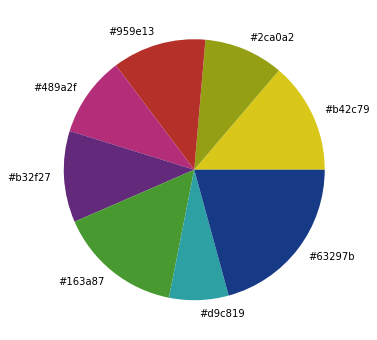

In [19]:
get_colors(get_img('colorful.jpg'), 8, True)

## Finding images using Colors

#### Getting all the images and store them in the images variable

In [36]:
import os

IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0],
    'WHITE': [255,255,255]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_img(os.path.join(IMAGE_DIRECTORY, file)))


#### Displaying all the images

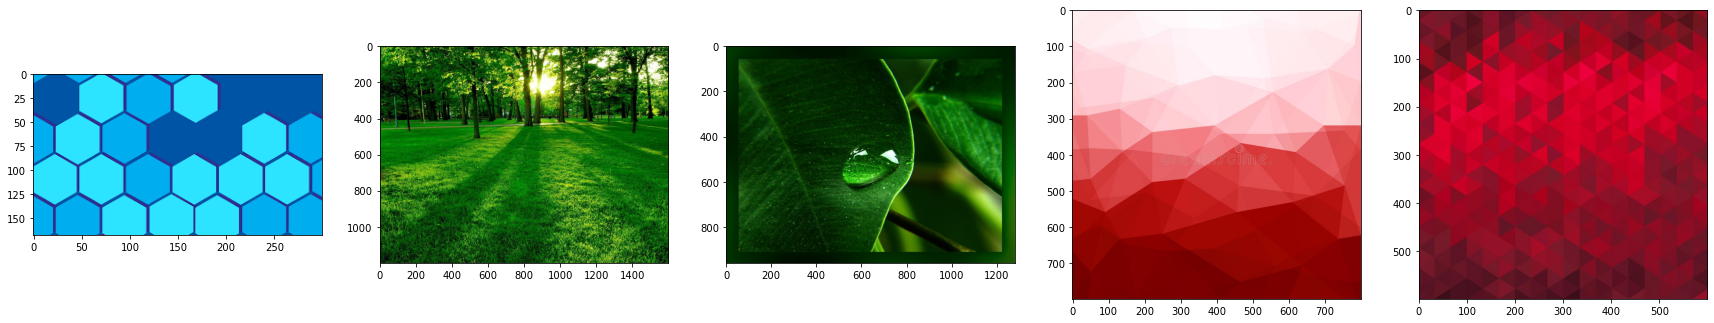

In [37]:
plt.figure(figsize=(30, 25))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

#### Function for finding images closest to the required color

In [32]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

#### Function to show the selected images

In [31]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Color Detections

### Search Blue

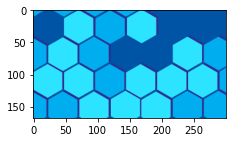

In [33]:
selected_color=COLORS['BLUE']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

### Search Green

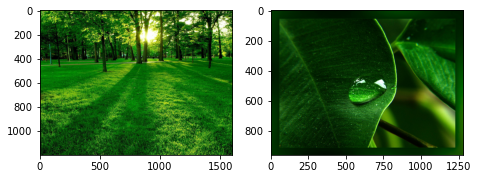

In [34]:
selected_color=COLORS['GREEN']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

### Search RED

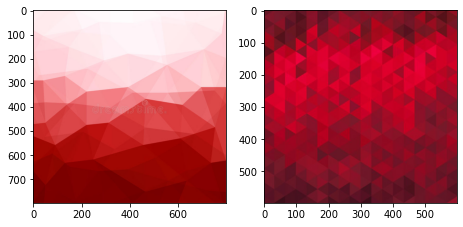

In [38]:
selected_color=COLORS['RED']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images,selected_color, threshold, 5)

## Thank You (●'◡'●)